<a href="https://colab.research.google.com/github/tasija03/OA/blob/main/OA_odbranaUsmeni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

import cirq_google

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.3 MB/s eta 0:00:00
    

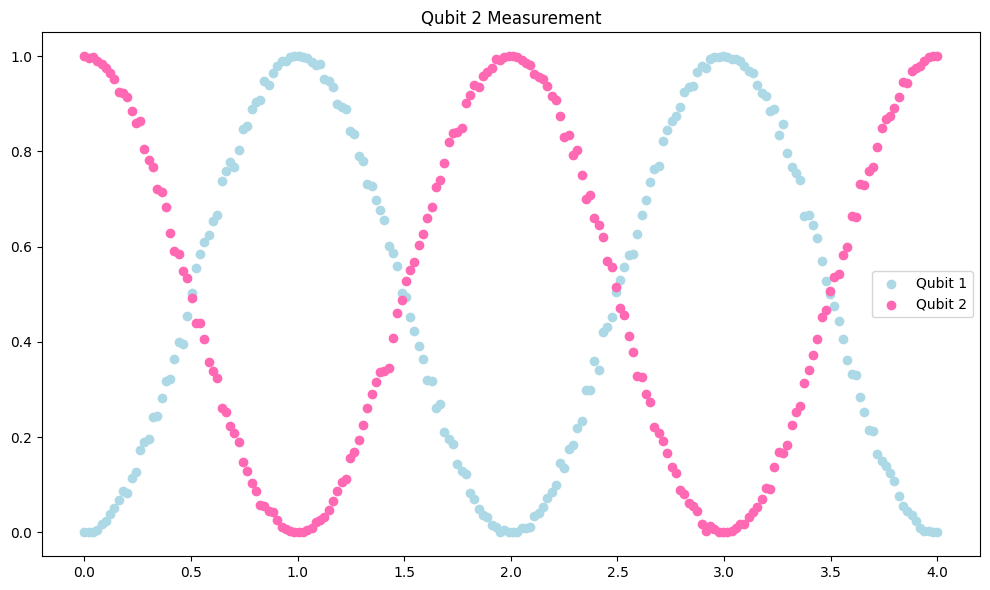

In [25]:
import sympy
import cirq
import matplotlib.pyplot as plt

#Definisemo qubit koji u resetci ima koordinate (3, 5)
qb = cirq.GridQubit(3, 5)
#Definisemo qubit sa koord. (2, 1)
qb1 = cirq.GridQubit(3, 5)
#Primenjujemo Z kapiju da bi smo |1> promenili u -|1>
circuit = cirq.Circuit(cirq.Z(qb),
                       cirq.X(qb) ** sympy.Symbol('t'),
                       cirq.measure(qb, key='m'))
circuit1 = cirq.Circuit(cirq.Z(qb1),
                       cirq.X(qb1) ** sympy.Symbol('t1'),
                       cirq.Y(qb1),
                       cirq.measure(qb1, key='m1'))

#kreiranje simulatora
simulator = cirq.Simulator()

#pravimo opseg za t
opseg = cirq.Linspace('t', start=0, stop=4, length=200)
opseg1 = cirq.Linspace('t1', start=0, stop=4, length=200)

#Pokrecemo simulaciju
rezultati = simulator.run_sweep(circuit, opseg, repetitions=1000)
rezultati1 = simulator.run_sweep(circuit1, opseg1, repetitions=1000)

#Pravimo grafik
x_data = [rezultat.params['t'] for rezultat in rezultati]
y_data = [rezultat.histogram(key='m')[1] / 1000.0 for rezultat in rezultati]
x_data1 = [rezultat1.params['t1'] for rezultat1 in rezultati1]
y_data1 = [rezultat1.histogram(key='m1')[1] / 1000.0 for rezultat1 in rezultati1]

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='lightblue', label='Qubit 1')
plt.scatter(x_data1, y_data1, color='hotpink', label='Qubit 2')
plt.title('Qubit 2 Measurement')
plt.legend()
plt.tight_layout()
plt.show()
